# CM50268 :: Final project

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 03, 2024. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import hmc_Lab as hmc

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 
 
 -  Please utilize zero-mean normalization on `X_train`and <font color=Red>refrain</font> from applying any normalization technique to obtain `y_train`.
  

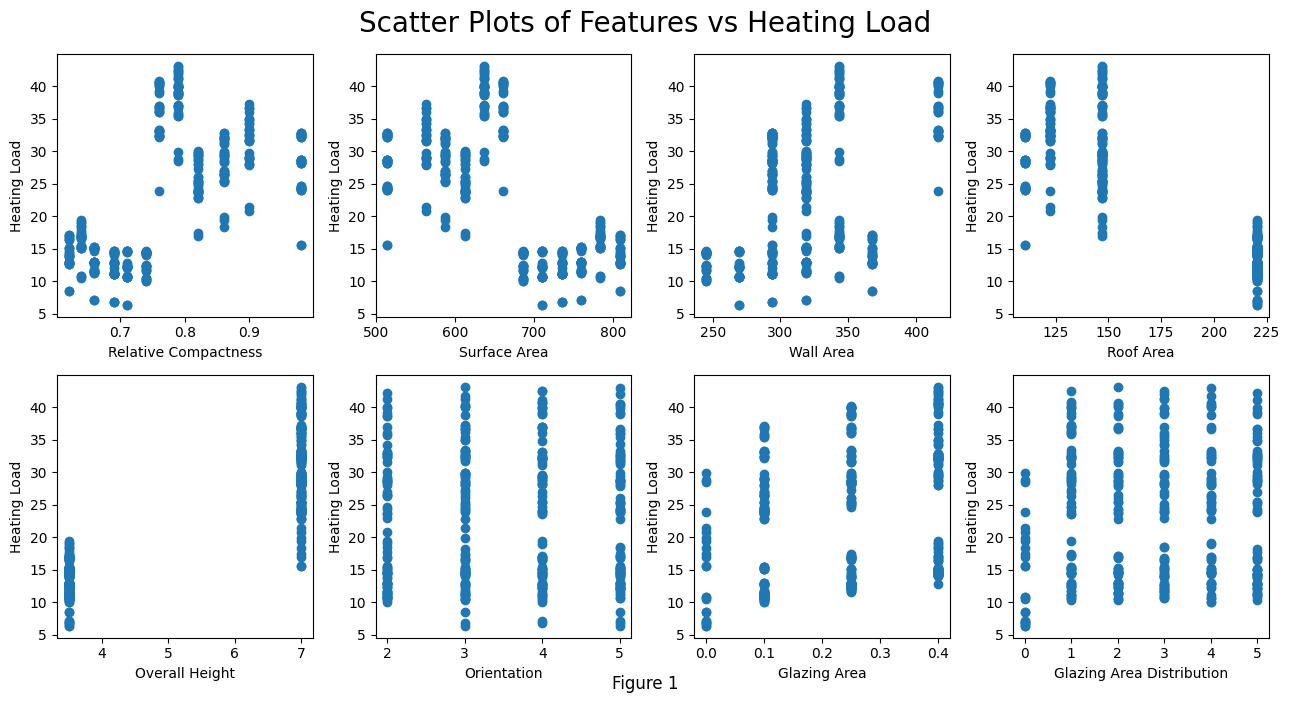

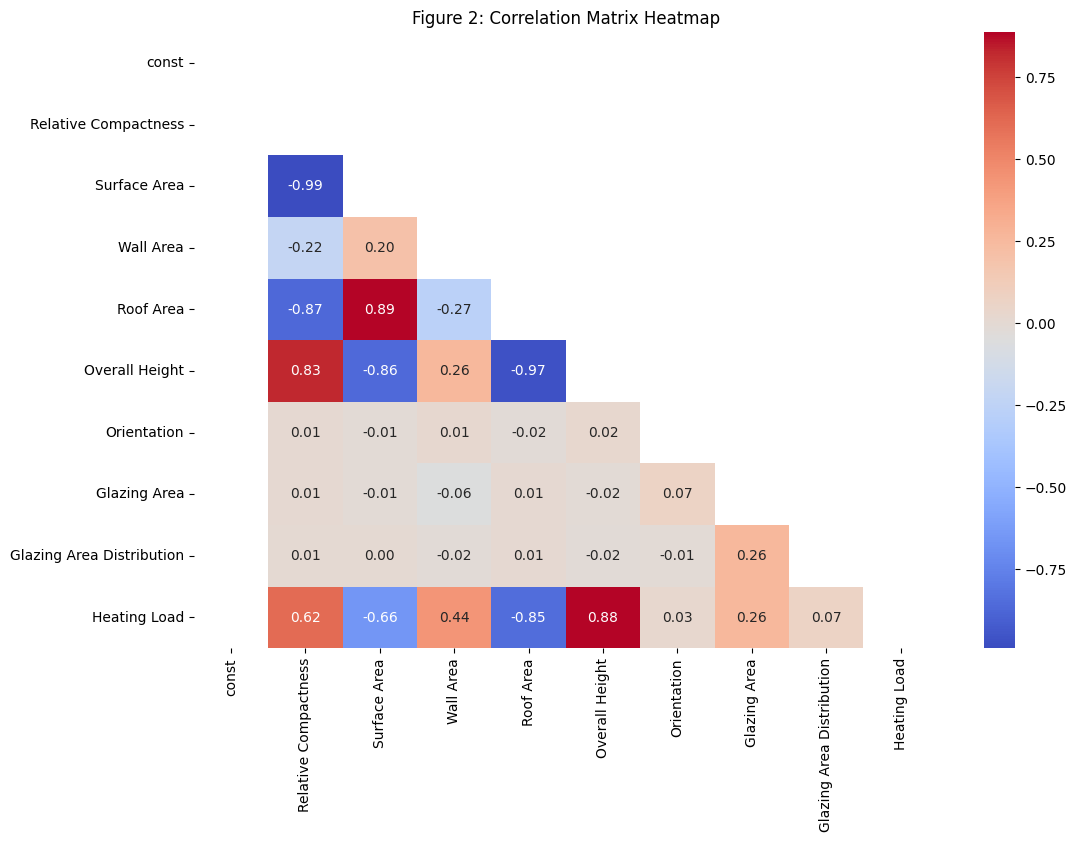

Mae for training data:  2.112865410591931
Mae for testing data:  2.020919154342097


/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/347802044.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Weights = np.linalg.lstsq(X_train,y_train)[0]


In [2]:
#### **** YOUR CODE HERE **** ####  
from sklearn.linear_model import LinearRegression
import seaborn as sns

df_train = pd.read_csv('/Users/luisweekes/Documents/Bayesian_Machine_Learning/Final Project-20240416/CM50268 BML Final Project 2024/ee-train.csv')
df_test = pd.read_csv('/Users/luisweekes/Documents/Bayesian_Machine_Learning/Final Project-20240416/CM50268 BML Final Project 2024/ee-test.csv')


std_columns = ['Relative Compactness','Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

"""
for col in std_columns:
    plt.figure(figsize=(8, 6))
    df_train.plot(kind='scatter', x=col, y = 'Heating Load')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Heating Load')
    plt.title(f'Scatter Plot: {col} vs Heating Load')

"""



# Create a grid of subplots with 4 rows and 2 columns
fig, axs = plt.subplots(2, 4, figsize=(13, 7))

# Flatten the axis array to iterate over all subplots
axs = axs.flatten()

# Iterate over each column in std_columns
for i, col in enumerate(std_columns):
    # Plot scatter plot for each column on the corresponding subplot
    axs[i].scatter(df_train[col], df_train['Heating Load'])
    
    # Add labels and title
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Heating Load')
    
fig.suptitle('Scatter Plots of Features vs Heating Load', fontsize=20)
# Adjust layout

plt.figtext(0.5, 0.01, 'Figure 1', ha='center', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


######         heat map 

corr = df_train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})

# Add title
plt.title('Figure 2: Correlation Matrix Heatmap')

# Show the plot
plt.show()

#Relative Compactness, Surface Area, wall area, roof area, overall height seem to have a linear relationship with heating load. 

X_train = df_train.iloc[:,:-1]
y_train = np.array(df_train.iloc[:,-1])

X_test = df_test.iloc[:,:-1]
y_test = np.array(df_test.iloc[:,-1])

mean = X_train.iloc[:,1:].mean()
std = X_train.iloc[:,1:].std()

X_train.iloc[:,1:] = (X_train.iloc[:,1:]- mean)/ std
X_test.iloc[:,1:] = (X_test.iloc[:,1:]- mean)/ std

X_train = np.array(X_train)
X_test = np.array(X_test)

Weights = np.linalg.lstsq(X_train,y_train)[0]

pred_train =  X_train @ Weights
train_pred = np.sum(X_train[0] * Weights)


pred_test =  X_test @ Weights 
test_pred = np.sum(X_test[0] * Weights)

def error_rms(t, y):
    """Compute RMS error for a prediction vector"""
    err = np.sqrt(np.mean((y - t) ** 2))
    return err

def error_mae(t, y):
    """Compute RMS error for a prediction vector"""
    err = np.mean(np.abs(np.subtract(y, t)))
    return err


mae_train = np.mean(np.abs(np.subtract(y_train, pred_train)))
mae_test = np.mean(np.abs(np.subtract(y_test, pred_test)))

print('Mae for training data: ',mae_train)
print('Mae for testing data: ',mae_test)

#### **** You can add extra cells to illustrate your results **** ####  

In [3]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
    if y_train.mean()<10:
        print('Do not apply any normalization technique to obtain `y_train`')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 in the specification doc)

###  **(6 marks for coding part)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters.


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [4]:
## Compute log-likelihood

# DO we need to invert Beta to get s2?
def compute_log_marginal(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####   
    s2 = 1/beta

    N, M = X.shape

    C = s2 * np.eye(N) + X @ X.T / alph

    logML = -N/2 * np.log(2*np.pi)

    _, log_det = np.linalg.slogdet(C)

    logML -= log_det / 2

    logML -= y.T @ np.linalg.inv(C) @ y / 2


    return logML   

Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms, <font color=Red> which is different from the previous coursework Part2</font>.

In [5]:
#### **** YOUR CODE HERE **** ####   
log_alphas_range = np.linspace(-5,0,100)
alphas_range = np.exp(log_alphas_range)

log_b_range = np.linspace(-5,0,100)
b_range = np.exp(log_b_range)

log_prob_y = np.zeros((100,100))
prob_y = np.zeros((100,100))

for i in range(len(b_range)):
    for j in range(len(alphas_range)):
        log_prob_y[i,j] = compute_log_marginal(X_train, y_train, alphas_range[j], b_range[i])

prob_y = np.exp(log_prob_y)

# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [6]:
#### **** YOUR CODE HERE **** ####

#needs fixing bc indeces do not match up with ranges. 
max_log_likelihood = float('-inf')
max_indeces = (float('-inf'),float('-inf'))
for i in range(len(b_range)):
    for j in range(len(alphas_range)):
        if log_prob_y[i,j] > max_log_likelihood:
            max_log_likelihood = log_prob_y[i,j]
            max_params = (log_alphas_range[j],log_b_range[i])

print('alph and beta: ',np.exp(max_params))
print('log alph and log beta: ',max_params)
print('max log-likelihood: ',max_log_likelihood)
print('max likelihood: ',np.exp(max_log_likelihood))

alpha, beta = np.exp(max_params)

log_alpha, log_beta = max_params



alph and beta:  [0.01174363 0.10836802]
log alph and log beta:  (-4.444444444444445, -2.2222222222222223)
max log-likelihood:  -1001.4507356501076
max likelihood:  0.0


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

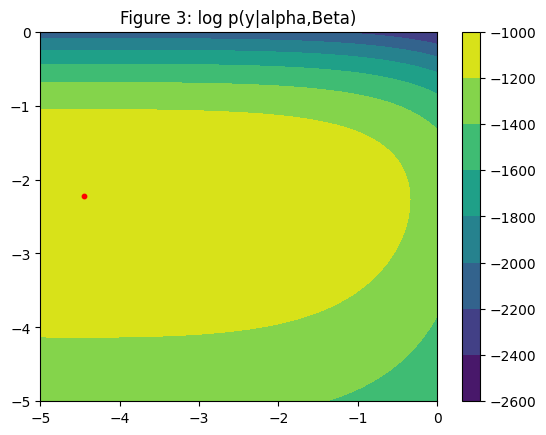

In [7]:
#### **** YOUR CODE HERE **** ####   

fig, ax = plt.subplots()
cp = ax.contourf(log_alphas_range, log_b_range, log_prob_y)
fig.colorbar(cp)
ax.set_title('Figure 3: log p(y|alpha,Beta)')

plt.scatter(log_alpha, log_beta, color='red', s=10)



Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [8]:
def compute_posterior(X, y, alph, beta):
    #ask about beta and s2 
    #### **** YOUR CODE HERE **** ####

    s2 = 1/beta
    #
    Mu = np.linalg.inv((X.T@X) + (s2 * alph * np.eye(X.shape[1])))@(X.T@y)
    SIGMA = s2*np.linalg.inv((X.T@X) + (s2 * alph * np.eye(X.shape[1]))) 
    #
    return Mu, SIGMA

Mu, SIGMA = compute_posterior(X_train,y_train,alpha,beta) #alpha and beta taken from above 

print('Type check: ',type(Mu))

print(Mu)

   

Type check:  <class 'numpy.ndarray'>
[22.91423654 -6.94138787 -3.73939795  0.80509096 -4.05571151  7.30373875
 -0.12620698  2.77479782  0.20303747]


Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [9]:
#### **** YOUR CODE HERE **** ####



Mu, SIGMA = compute_posterior(X_train,y_train,alpha,beta) #alpha and beta taken from above 

print('Type check: ',type(Mu))

print('Weights: ',Mu)



pred_train = X_train @ Mu
err_train = error_rms(y_train,pred_train)

print("RMS Training error: ", err_train)

pred_test_BLR = X_test @ Mu

err_test = error_rms(y_test,pred_test_BLR)

print("RMS Test error: ", err_test)

mae_test = error_mae(y_test, pred_test_BLR)

print('Mae for testing data: ',mae_test)

pred_test_BLR_1 = X_test[0] @ Mu
print(pred_test_BLR_1)





Type check:  <class 'numpy.ndarray'>
Weights:  [22.91423654 -6.94138787 -3.73939795  0.80509096 -4.05571151  7.30373875
 -0.12620698  2.77479782  0.20303747]
RMS Training error:  3.0116952593212725
RMS Test error:  2.843435270163562
Mae for testing data:  2.0668363800292964
22.552185174118588


# Task 3: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks for coding part)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [10]:
from scipy.stats import multivariate_normal

def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    
    #lgp = stats.multivariate_normal.logpdf(x,(0,0),covar)
    constant_term = -0.5 * 2 * np.log(2 * np.pi)  # Constant term
    # Calculate the log of the determinant of the covariance matrix
    log_det_sigma = -0.5 * np.log(np.linalg.det(covar))
    # Calculate the difference between the observed values and the mean vector
    diff = x - (0,0)
    # Calculate the log of the PDF
    lgp = constant_term + log_det_sigma - 0.5 * np.dot(diff.T, np.linalg.solve(covar, diff))

    return -lgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    
    g = np.linalg.inv(covar) @ x
    
    return g



## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

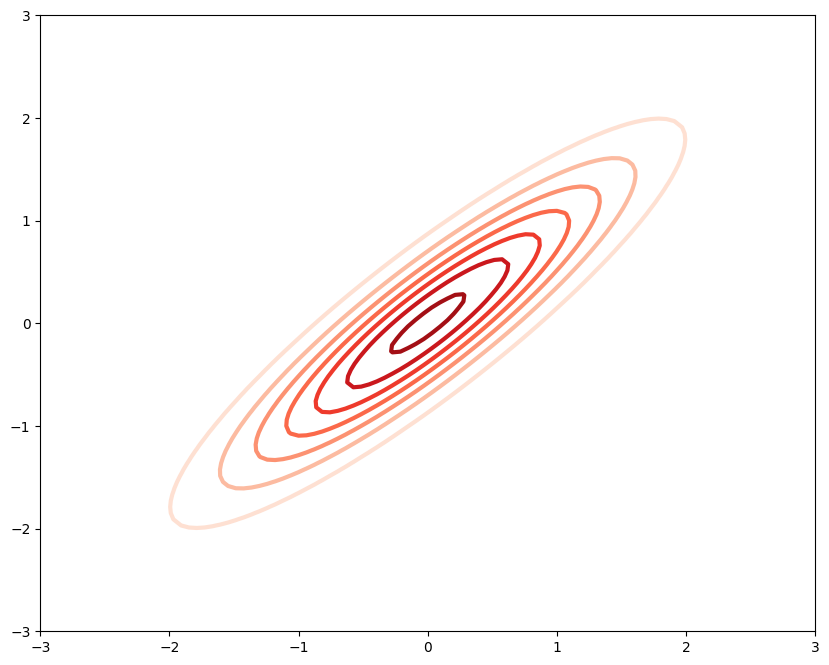

In [11]:

#### **** YOUR CODE BELOW **** ####

 #############################################What should we set the covar to?
 
covar = np.array([[1,0.9],[0.9,1]]) 


#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1)

In [12]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [13]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
     10.6102       10.6102   2.940173e-10  11
    -10.7383      -10.7383  -2.260665e-09  10


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
     10.6102       10.6102   2.940173e-10  11
    -10.7383      -10.7383  -2.260665e-09  10
|----------|  0% accepted [ 1 secs to go ]
|#---------| 88% accepted [ 1 secs to go ]
|##--------| 89% accepted [ 1 secs to go ]
|###-------| 89% accepted [ 1 secs to go ]
|####------| 89% accepted [ 1 secs to go ]
|#####-----| 89% accepted [ 1 secs to go ]
|######----| 89% accepted [ 1 secs to go ]
|#######---| 89% accepted [ 0 secs to go ]
|########--| 89% accepted [ 0 secs to go ]
|#########-| 89% accepted [ 0 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=10000 / L=20 / eps=0.4 / Accept=89.5%


Text(0.5, 1.0, 'Figure 4: True Distribution Versus Generated Samples From HMC Algorithm')

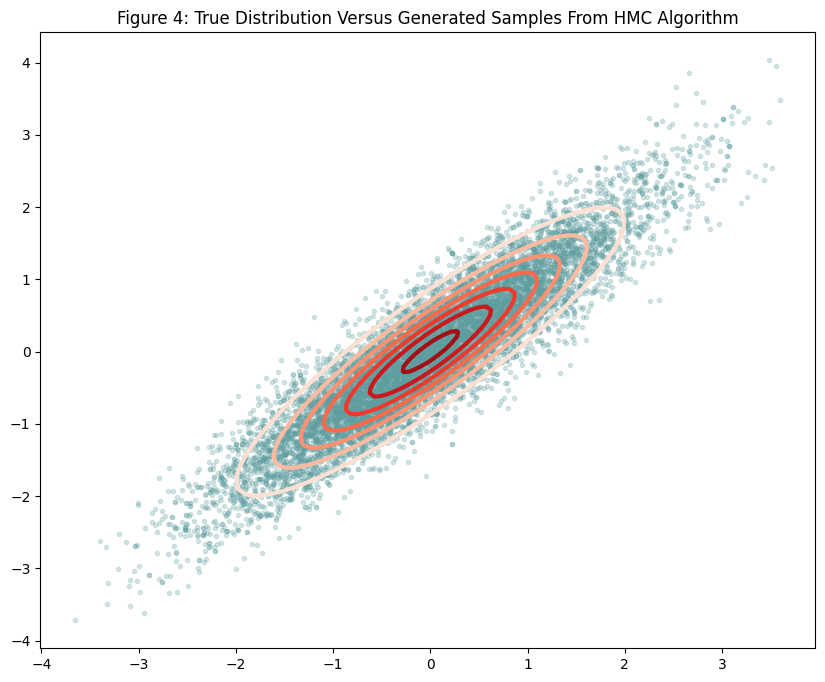

In [14]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####


R = 10000
L = 20
eps = .4
burn = int(R/10)

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1)
plt.title('Figure 4: True Distribution Versus Generated Samples From HMC Algorithm')

In [15]:
#### **** YOUR CODE HERE **** ####

#WHat else do we need?

#### **** You can add extra figures to support the individual report **** ####

# Task 4: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(6 marks for coding part)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [16]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    
    alpha = np.exp(hps[0])
    beta = np.exp(hps[1])

    #alpha = hps[0]
    #beta = hps[1]

    w = hps[2:]
    n,m = x.shape
    res = y - np.dot(x, w)

    neglgp = ((0.5 * beta * np.dot(res.T,res)) - (0.5 * n * np.log(beta/ 2*np.pi))) + (0.5 * alpha * np.dot(w.T,w)) - (0.5 * m * np.log(alpha/ 2*np.pi))
    
    return neglgp 

In [17]:
def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    
    alpha = np.exp(hps[0])
    beta = np.exp(hps[1])

   # alpha = hps[0]
    #beta = hps[1]

    w = hps[2:]
    n,m = x.shape

    residual = y - (x @ w)
    grad_w = -beta * np.dot(x.T, residual) + alpha * w
    #grad_w =  alpha * w

    grad_alpha = -(-0.5 * np.dot(w.T,w) + (m/(2*alpha))) * alpha 
    grad_beta = (0.5 * np.dot(residual.T,residual) - (n/(2*beta))) * beta 

    
    values = np.array([grad_alpha])
    values = np.append(values,grad_beta)
    values = list(values)
    grad_w = list(grad_w)
    values = values + grad_w

    values = np.array(values)

    g = np.array(values)

    return g

In [18]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####

R = 10000
L = 50
eps = .012
burn = int(R/10)

#### you can adjust the hpyer-parameters. 
x0 = np.zeros(11)

#x0 = np.random.normal(size = 11)

S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train])

Calc.         Numeric       Delta         Acc.
        -4.5          -4.5   2.114568e-06   7
      120081        120081   4.620524e-07  12
    -8801.55      -8801.55  -1.505045e-05   9
    -2372.66      -2372.66  -1.532831e-05   9
        2532          2532  -8.819197e-06   9
    -1684.11      -1684.11  -3.733530e-05   8
     3282.61       3282.61   1.846039e-05   9
     -3403.2       -3403.2  -4.912678e-05   8
    -102.401      -102.401  -3.236848e-06   8
    -990.163      -990.163  -4.647769e-05   8
    -252.783      -252.783   3.307099e-05   7
|----------|  0% accepted [ 6 secs to go ]


/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/647944423.py:19: RuntimeWarning: overflow encountered in scalar divide
  grad_beta = (0.5 * np.dot(residual.T,residual) - (n/(2*beta))) * beta
/Users/luisweekes/Documents/Bayesian_Machine_Learning/Final Project-20240416/CM50268 BML Final Project 2024/hmc_Lab.py:107: RuntimeWarning: invalid value encountered in subtract
  p -= epsilon * grad_U(q, *args)
/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/647944423.py:14: RuntimeWarning: invalid value encountered in matmul
  residual = y - (x @ w)
/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/647944423.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  grad_alpha = -(-0.5 * np.dot(w.T,w) + (m/(2*alpha))) * alpha
/Users/luisweekes/Documents/Bayesian_Machine_Learning/Final Project-20240416/CM50268 BML Final Project 2024/hmc_Lab.py:121: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() < np.exp(current_U-prop

|#---------| 42% accepted [ 5 secs to go ]
|##--------| 71% accepted [ 5 secs to go ]
|###-------| 80% accepted [ 4 secs to go ]
|####------| 85% accepted [ 4 secs to go ]
|#####-----| 88% accepted [ 3 secs to go ]
|######----| 90% accepted [ 2 secs to go ]
|#######---| 92% accepted [ 2 secs to go ]
|########--| 93% accepted [ 1 secs to go ]
|#########-| 93% accepted [ 1 secs to go ]
|##########| 94% accepted [ 0 secs to go ]
HMC: R=10000 / L=50 / eps=0.012 / Accept=94.0%


## Print out the RMSE and plot figures for your report

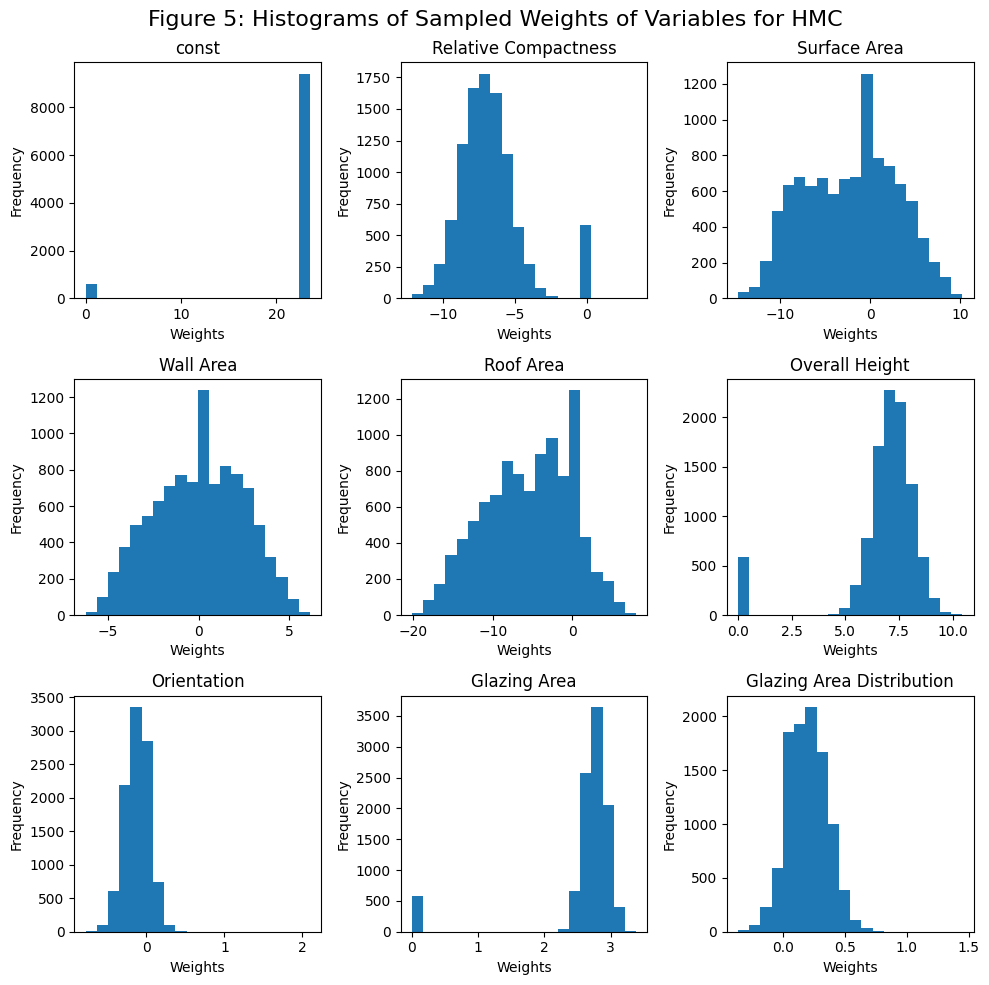

mean weights for HMC:  [ 2.15692983e+01 -6.74759764e+00 -2.14959085e+00 -3.16196662e-03
 -5.50584433e+00  6.79814907e+00 -1.18236802e-01  2.60987845e+00
  1.92058986e-01]
mean alpha and beta for HMC:  [-4.25438156 -2.137288  ]
HMC_RMSE:  3.1420250598762918
HMC_MAE:  2.3626075614447832


In [19]:
#### **** YOUR CODE HERE **** ####

weights_HMC = S[:, 2:]
columns = ['const','Relative Compactness','Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
num_columns = weights_HMC.shape[1]

# Create subplots for each column
fig, axs = plt.subplots(3,3, figsize=(10, 10))  # Adjust figsize as needed

# Plot histogram for each column
for i in range(num_columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(weights_HMC[:, i], bins=20)  # Adjust number of bins as needed
    axs[row, col].set_title(columns[i])
    axs[row, col].set_xlabel('Weights')
    axs[row, col].set_ylabel('Frequency')

fig.suptitle('Figure 5: Histograms of Sampled Weights of Variables for HMC', fontsize=16)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

weights_HMC_mean = np.mean(weights_HMC,axis = 0)

print('mean weights for HMC: ',weights_HMC_mean)


alpha_beta_HMC = S[:, 0:2]

#alpha_beta_HMC = np.stack(alpha_beta_HMC,axis = 0)

alpha_beta_HMC_mean= np.mean(alpha_beta_HMC,axis = 0)

print('mean alpha and beta for HMC: ',alpha_beta_HMC_mean)



pred_HMC = X_test @ weights_HMC_mean

HMC_RMSE = error_rms(y_test,pred_HMC)
print('HMC_RMSE: ',HMC_RMSE)

HMC_MAE = error_mae(y_test,pred_HMC)
print('HMC_MAE: ',HMC_MAE)



# Task 5: Apply HMC as a Classifier (Section 4.5 in the specification doc)

###  **(5 marks for the coding part)**

There's no restriction on the classifier implementation, please follow the instricution/hints in the specification document. You may receive 1 extra bonus mark depending on the quality of implementation.  


    
    


In [20]:
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

In [21]:
y_test_class = np.array([1 if value > 23 else 0 for value in y_test])
y_train_class = np.array([1 if value > 23 else 0 for value in y_train])

def energy_func_cl(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    
    alpha = np.exp(hps[0])
    w = hps[1:]
    n,m = x.shape
    
    p = 1 / (1 + np.exp(-x@w))
    
    neglikelihood = -(np.sum(((y *np.log(p)) + (1-y) * np.log(1-p))))
  
    neglprior =  ((0.5 * alpha * np.dot(w.T,w)) - (0.5 * m * np.log(alpha/ 2*np.pi)))
    
    return neglikelihood + neglprior 

def energy_grad_cl(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    
    alpha = np.exp(hps[0])
    w = hps[1:]
    n,m = x.shape

    p = 1 / (1 + np.exp(-np.dot(x,w)))

    grad_w = (np.dot(x.T,(p-y))) + (alpha * w) 

    grad_alpha = -(-0.5 * np.dot(w.T,w) + (m/(2*alpha))) * alpha

    
    values = np.array([grad_alpha])
    values = list(values)
    grad_w = list(grad_w)
    values = values + grad_w

    values = np.array(values)

    g = np.array(values)

    return g

np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####

R = 10000
L = 50
eps = .025
burn = int(R/10)

#### you can adjust the hpyer-parameters. 
x0 = np.zeros(10)

#x0 = np.random.normal(size = 10)

S, *_ = hmc.sample(x0, energy_func_cl, energy_grad_cl, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train_class])






Calc.         Numeric       Delta         Acc.
        -4.5          -4.5  -1.706030e-08   9
          -2            -2   5.049515e-09   9
    -146.668      -146.668   1.509261e-08  10
     153.019       153.019  -1.315868e-08  11
    -53.0756      -53.0756  -1.612234e-08  10
     175.444       175.444   3.612695e-08  10
    -180.099      -180.099   8.405721e-10  12
    -7.22157      -7.22157  -2.795948e-09  10
    -16.1381      -16.1381  -2.197750e-08   9
      -11.44        -11.44  -1.767587e-09  10


/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/1966395234.py:13: RuntimeWarning: divide by zero encountered in log
  neglikelihood = -(np.sum(((y *np.log(p)) + (1-y) * np.log(1-p))))
/var/folders/gx/7z1dq92j5c9gx2mq7hmzzjbh0000gn/T/ipykernel_31917/1966395234.py:13: RuntimeWarning: invalid value encountered in multiply
  neglikelihood = -(np.sum(((y *np.log(p)) + (1-y) * np.log(1-p))))


|----------|  0% accepted [ 6 secs to go ]
|#---------| 28% accepted [ 6 secs to go ]
|##--------| 63% accepted [ 5 secs to go ]
|###-------| 75% accepted [ 4 secs to go ]
|####------| 81% accepted [ 4 secs to go ]
|#####-----| 85% accepted [ 3 secs to go ]
|######----| 88% accepted [ 2 secs to go ]
|#######---| 89% accepted [ 2 secs to go ]
|########--| 91% accepted [ 1 secs to go ]
|#########-| 92% accepted [ 1 secs to go ]
|##########| 92% accepted [ 0 secs to go ]
HMC: R=10000 / L=50 / eps=0.025 / Accept=92.4%


In [22]:


def accuracy(y_true, y_pred):
    
    # Calculate the number of correctly predicted labels
    correct = np.sum(y_true == y_pred)
    
    # Total number of labels
    total = len(y_true)
    
    # Compute accuracy
    accuracy_score = correct / total
    
    return accuracy_score

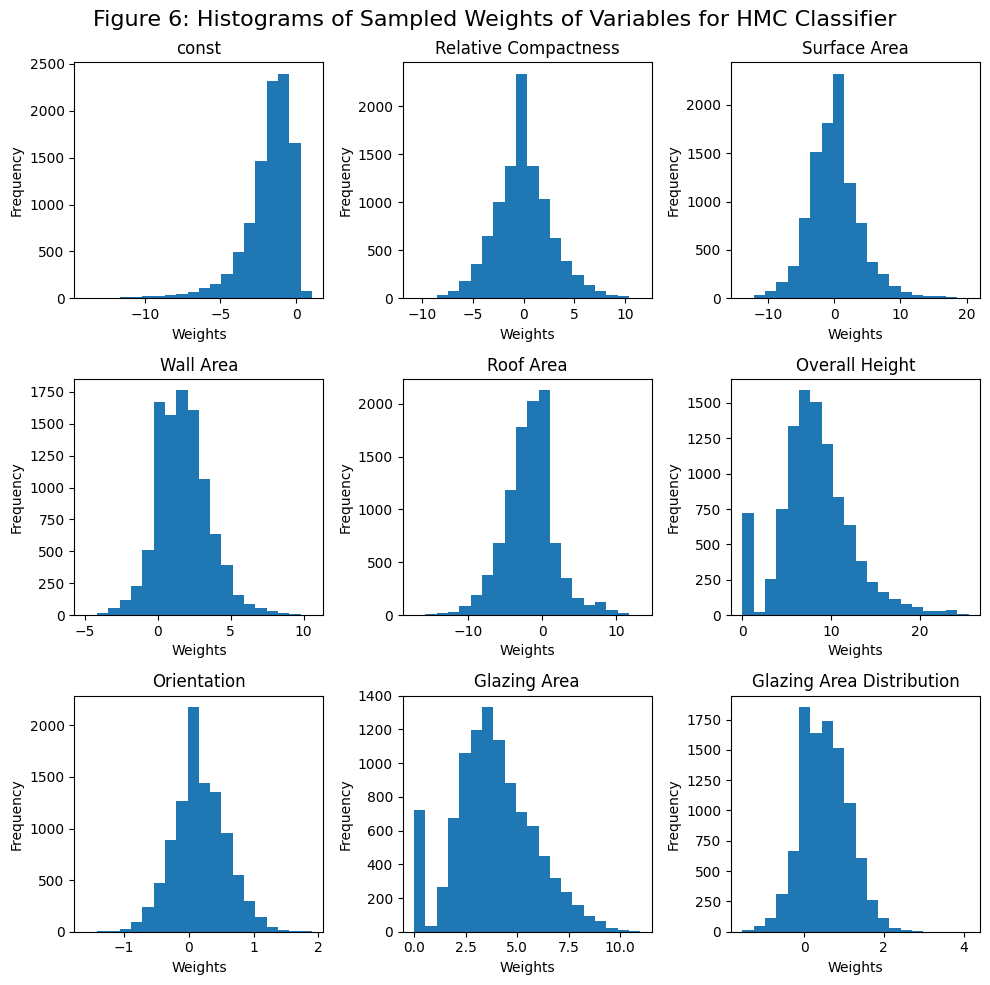

mean of classifier weights:  [-1.83995317e+00 -1.11167064e-02 -1.06200636e-03  1.73687864e+00
 -1.69344276e+00  8.18405766e+00  1.69092669e-01  3.85697481e+00
  5.21694028e-01]
mean of alphas:  -2.5697778068628447
misclassification rate: 0.78125 %


In [23]:
weights_classifier = S[:, 1:]

columns = ['const','Relative Compactness','Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
num_columns = 9

# Create subplots for each column
fig, axs = plt.subplots(3,3, figsize=(10, 10))  # Adjust figsize as needed

# Plot histogram for each column
for i in range(num_columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(weights_classifier[:, i], bins=20)  # Adjust number of bins as needed
    axs[row, col].set_title(columns[i])
    axs[row, col].set_xlabel('Weights')
    axs[row, col].set_ylabel('Frequency')

fig.suptitle('Figure 6: Histograms of Sampled Weights of Variables for HMC Classifier', fontsize=16)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


weights_classifier_mean = np.mean(weights_classifier,axis = 0)

print('mean of classifier weights: ',weights_classifier_mean)

alpha_classifier = S[:, 0]

#alpha_classifier = np.stack(alpha_classifier,axis = 0)

alpha_classifier_mean = np.mean(alpha_classifier,axis = 0)

print('mean of alphas: ',alpha_classifier_mean)

pred_classifier = X_test @ weights_classifier_mean

classifier_probs = sigmoid(pred_classifier)

classifier_preds = [1 if value > 0.5 else 0 for value in classifier_probs]

accuracy_classifier = accuracy(y_test_class,classifier_preds)
print('misclassification rate:', (1-accuracy_classifier)*100,'%')

# Task 6: Variational Inference (Section 4.6 in the specification doc)

###  **(4 marks for coding part)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

<font color=Red> The corresponding derivations should be completed in your report.</font>



In [24]:
VI_weights_samples = []
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####

    n,m = X_train.shape
    a_0,b_0,c_0,d_0 = 0.000001,0.000001,0.000001,0.000001 #weak priors for alpha and beta 

    #initialize params:

    an, bn = a_0, b_0
    cn,dn = c_0, d_0
    mu_n = np.zeros(m)
    sig_n = np.eye(m)

    for i in range(100):

        q_alpha = an/bn
        q_beta = cn/dn
        
        sig_n = np.linalg.inv(np.dot(X_train.T,X_train) * q_beta + np.eye(m) * q_alpha)
        mu_n = (sig_n @ X_train.T @ y_train) * q_beta
        VI_weights_samples.append(mu_n)
        

        q_w = np.sum(np.diag(sig_n) + mu_n **2)

        an = a_0 + (m/2)
        bn = b_0 + (1/2 * q_w)
        

        cn = c_0 + (n/2)
        dn = d_0 + 0.5 * (np.sum((Y_train - np.dot(X_train,mu_n))**2) + np.sum(np.dot(X_train,sig_n) * X_train))
        

    
    return an,bn,cn,dn, mu_n, sig_n


Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 

In [25]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####




exp_alpha = an/bn
print('exp_alpha: ',exp_alpha)
exp_beta = cn/dn 
print('exp_beta: ',exp_beta)




exp_alpha:  0.011917648488649615
exp_beta:  0.10797297441522449


In [26]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [27]:
#### **** YOUR CODE HERE **** ####

print('VI weights: ',mu_n)

pred_VI_test = X_test @ mu_n

VI_RMSE_test = error_rms(y_test,pred_VI_test)
print('VI RMSE test: ',VI_RMSE_test)

VI_MAE_test = error_mae(y_test,pred_VI_test)
print('VI mae test: ',VI_MAE_test)

pred_VI_train = X_train @ mu_n

VI_RMSE_train = error_rms(y_train,pred_VI_train)
print('VI RMSE train: ',VI_RMSE_train)

VI_MAE_train = error_rms(y_train,pred_VI_train)
print('VI mae train: ',VI_MAE_train)


VI weights:  [22.91411674 -6.93612046 -3.73579719  0.80593674 -4.05256963  7.30527214
 -0.12622194  2.77481359  0.2030147 ]
VI RMSE test:  2.843435580135585
VI mae test:  2.066800942279526
VI RMSE train:  3.011700325280263
VI mae train:  3.011700325280263


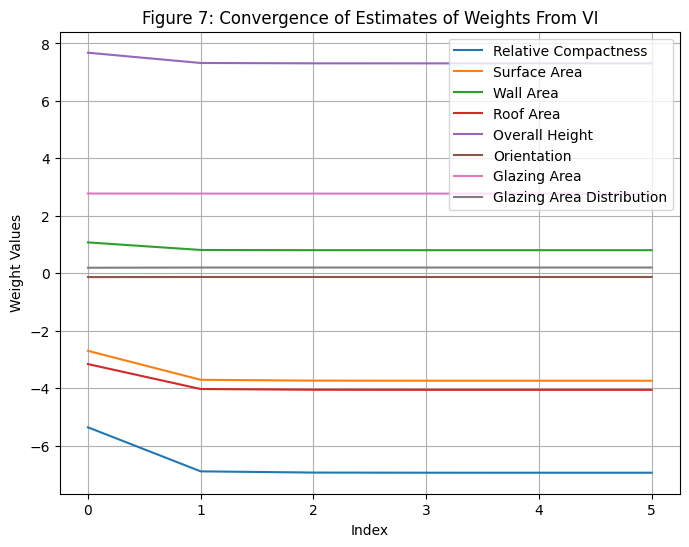

In [28]:
#print(VI_weights_samples)

const = []
Relative_Compactness = []
Surface_Area = []
Wall_Area = []
Roof_Area = []
Overall_Height = []
Orientation = []
Glazing_Area = []
Glazing_Area_Distribution = []


for i,array in enumerate(VI_weights_samples):
    if i>5:
        break
    const.append(array[0])
    Relative_Compactness.append(array[1])
    Surface_Area.append(array[2])
    Wall_Area.append(array[3])
    Roof_Area.append(array[4])
    Overall_Height.append(array[5])
    Orientation.append(array[6])
    Glazing_Area.append(array[7])
    Glazing_Area_Distribution.append(array[8])



plt.figure(figsize=(8, 6))
#plt.plot(const, label=const)
plt.plot(Relative_Compactness, label='Relative Compactness')
plt.plot(Surface_Area, label='Surface Area')
plt.plot(Wall_Area, label='Wall Area')
plt.plot(Roof_Area, label='Roof Area')
plt.plot(Overall_Height, label='Overall Height')
plt.plot(Orientation, label='Orientation')
plt.plot(Glazing_Area, label='Glazing Area')
plt.plot(Glazing_Area_Distribution, label='Glazing Area Distribution')

plt.xlabel('Index')
plt.ylabel('Weight Values')
plt.title('Figure 7: Convergence of Estimates of Weights From VI')
plt.grid(True)
plt.legend()
plt.show()

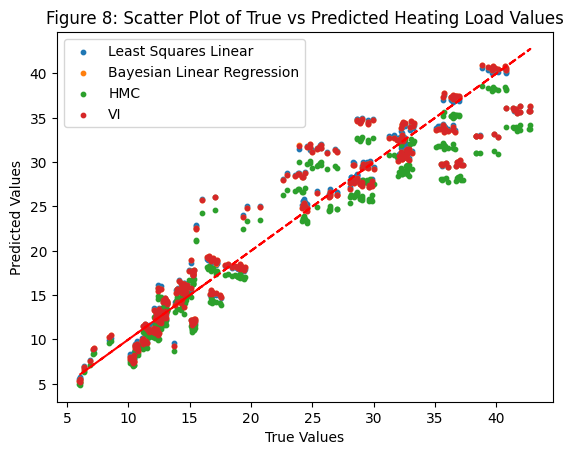

In [29]:
#Summary stuff 

# true values and predicted values from different models



plt.scatter(y_test, pred_test, label='Least Squares Linear',s=10)


plt.scatter(y_test, pred_test_BLR, label='Bayesian Linear Regression',s=10)


plt.scatter(y_test, pred_HMC, label='HMC',s=10)


plt.scatter(y_test, pred_VI_test, label='VI',s=10)

# Add labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Add a diagonal line for perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--')

# Add a title
plt.title('Figure 8: Scatter Plot of True vs Predicted Heating Load Values')

# Show the plot
plt.show()